# import libraries

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action = 'ignore')

# load the dataset

In [204]:
players_df = pd.read_csv('sample_submission[1].csv')
matches_df = pd.read_csv('train_matches[1].csv')
final_df = pd.read_csv('validation[1].csv')

# Sanity Check of Data

In [205]:
matches_df.shape
players_df.shape
final_df.shape

(329, 19)

# To get display first five rows

In [206]:
matches_df.head()
players_df.head()
final_df.head()

id   season       city        date match_type  player_of_match  \
0   980933     2016      Delhi  2016-04-23     League        SV Samson   
1   419130  2009/10     Mumbai  2010-03-28     League  Harbhajan Singh   
2   392213     2009  Centurion  2009-05-07     League          A Singh   
3  1254083     2021  Ahmedabad  2021-04-30     League    Harpreet Brar   
4  1359510     2023  Bengaluru  2023-04-26     League         CV Varun   

                              venue                        team1  \
0                  Feroz Shah Kotla             Delhi Daredevils   
1        Dr DY Patil Sports Academy              Deccan Chargers   
2                   SuperSport Park  Royal Challengers Bangalore   
3  Narendra Modi Stadium, Ahmedabad                 Punjab Kings   
4  M Chinnaswamy Stadium, Bengaluru        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0               Mumbai Indians               Mumbai Indians         field   
1               Mumbai Indians              Deccan Chargers         field   
2             Rajasthan Royals             Rajasthan Royals         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

    result  result_margin  target_runs  target_overs super_over method  \
0     runs           10.0        165.0          20.0          N    NaN   
1     runs           41.0        173.0          20.0          N    NaN   
2  wickets            7.0        106.0          20.0          N    NaN   
3     runs           34.0        180.0          20.0          N    NaN   
4     runs           21.0        201.0          20.0          N    NaN   

                 umpire1        umpire2  
0                 S Ravi  C Shamshuddin  
1                  S Das    K Hariharan  
2            K Hariharan      DJ Harper  
3                 S Ravi      VK Sharma  
4  KN Ananthapadmanabhan       R Pandit

# Information about dataset

In [207]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               766 non-null    int64  
 1   season           766 non-null    object 
 2   city             733 non-null    object 
 3   date             766 non-null    object 
 4   match_type       766 non-null    object 
 5   player_of_match  762 non-null    object 
 6   venue            766 non-null    object 
 7   team1            766 non-null    object 
 8   team2            766 non-null    object 
 9   toss_winner      766 non-null    object 
 10  toss_decision    766 non-null    object 
 11  winner           762 non-null    object 
 12  result           766 non-null    object 
 13  result_margin    755 non-null    float64
 14  target_runs      764 non-null    float64
 15  target_overs     764 non-null    float64
 16  super_over       766 non-null    object 
 17  method          

# Convert 'Match Date' to datetime

matches_df['date'] = pd.to_datetime(matches_df['date'])

# checking for dupplicates

In [209]:
matches_df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [210]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

# display statictics

In [211]:
matches_df.describe(include = 'number').T

count           mean            std       min        25%  \
id             766.0  912036.746736  369932.443988  335982.0  548326.25   
result_margin  755.0      17.374834      22.062033       1.0       6.00   
target_runs    764.0     166.625654      33.475739      48.0     146.00   
target_overs   764.0      19.786649       1.495394       5.0      20.00   

                    50%         75%        max  
id             980989.0  1254069.75  1426310.0  
result_margin       8.0       20.00      146.0  
target_runs       166.0      186.00      288.0  
target_overs       20.0       20.00       20.0

# To display visualize the Pairplot


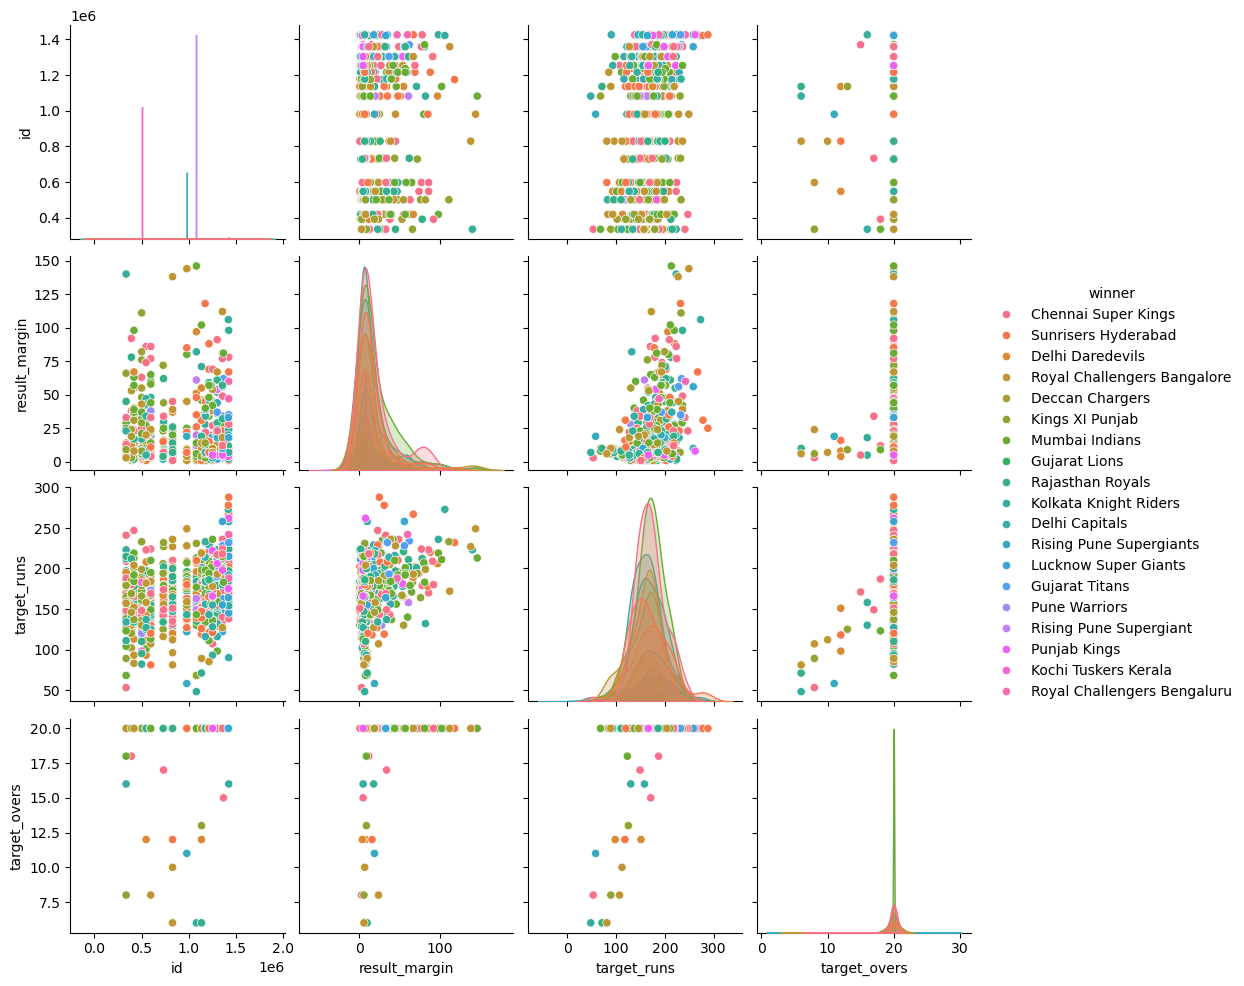

In [212]:
sns.pairplot(matches_df, hue = 'winner')
plt.show()

# Display the Histogram to understand the Distribution


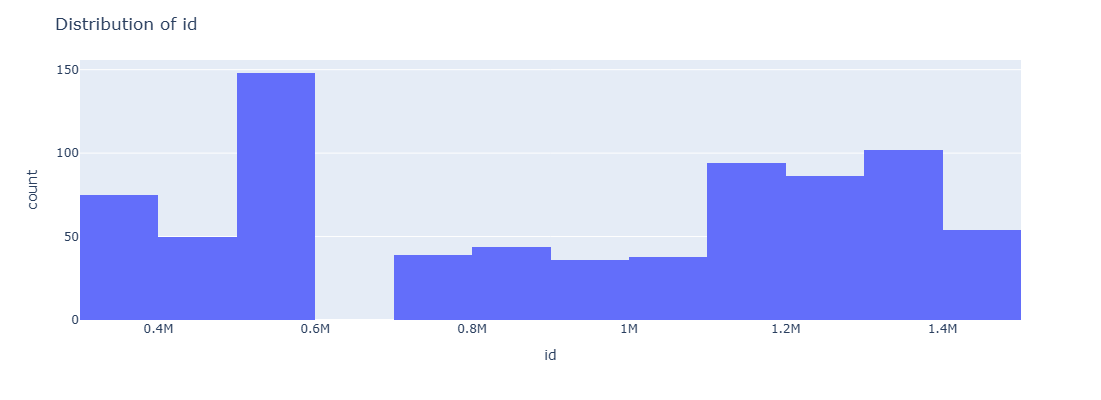

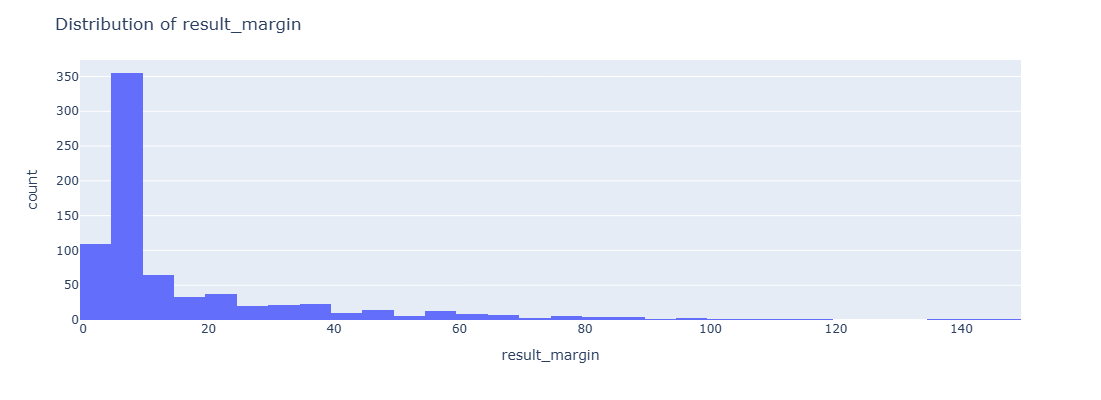

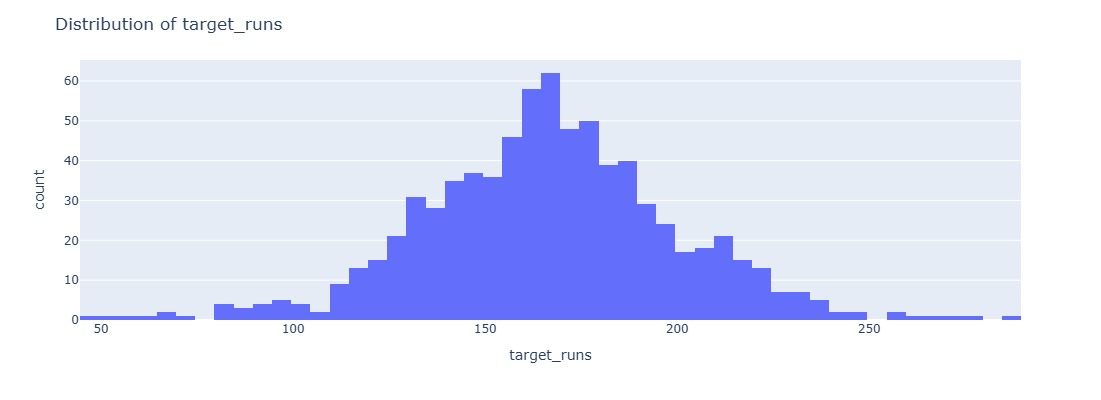

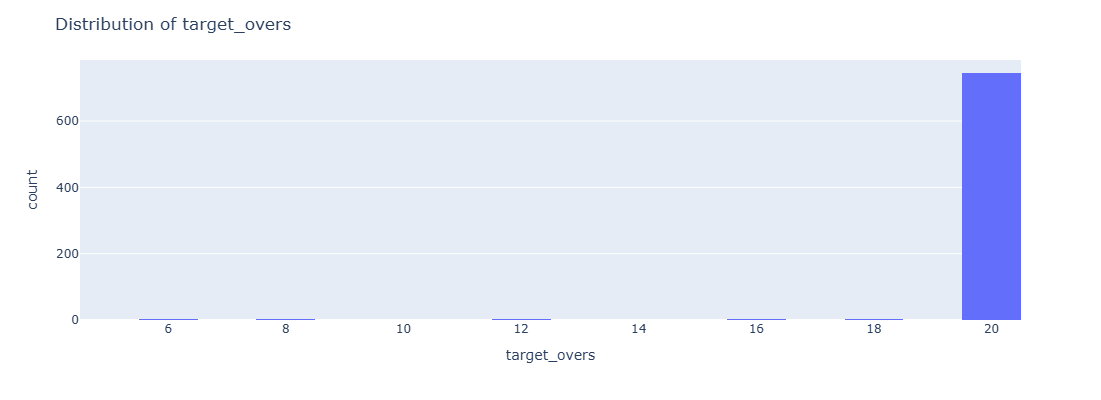

In [213]:
for i in matches_df.select_dtypes(include = 'number').columns:
    fig = px.histogram(matches_df, x = i)
    fig.update_layout(
    title = f'Distribution of {i}',
    height = 400,
    width = 700)
    fig.show()

# Boxplot to identify Outliers


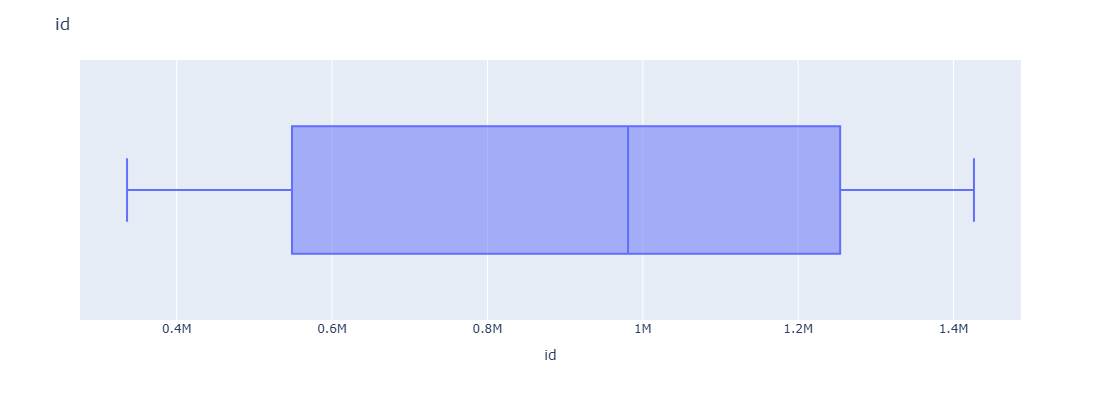

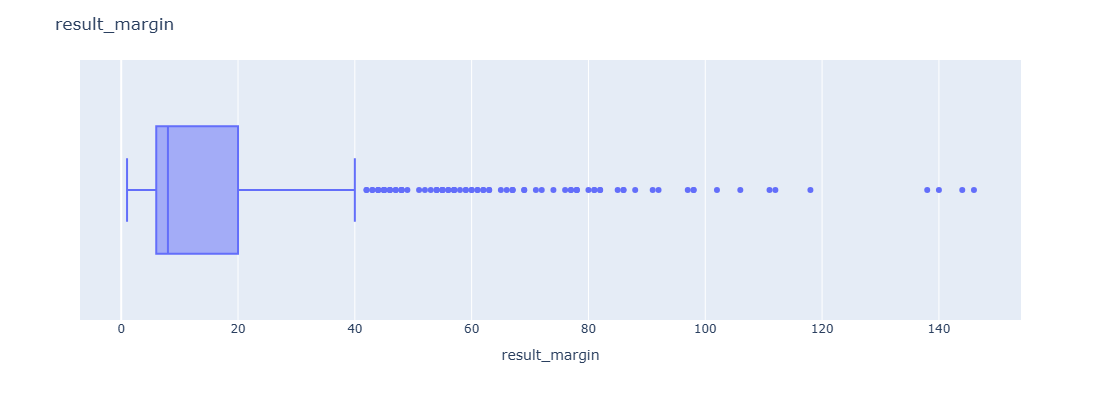

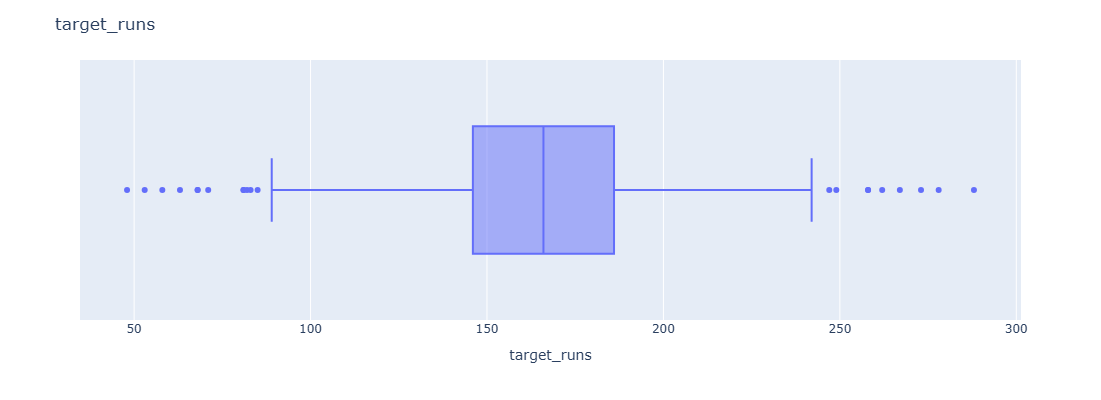

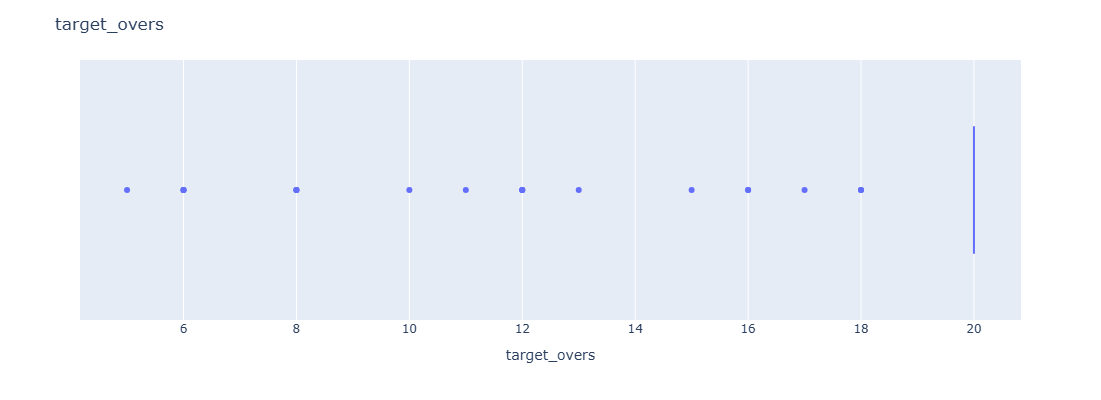

In [214]:
for i in matches_df.select_dtypes(include = 'number').columns:
    fig = px.box(matches_df, x = i)
    fig.update_layout(
    height = 400,
    width = 700,
    title = f' {i}'
    )
    fig.show()

# Number of Wins by each Team


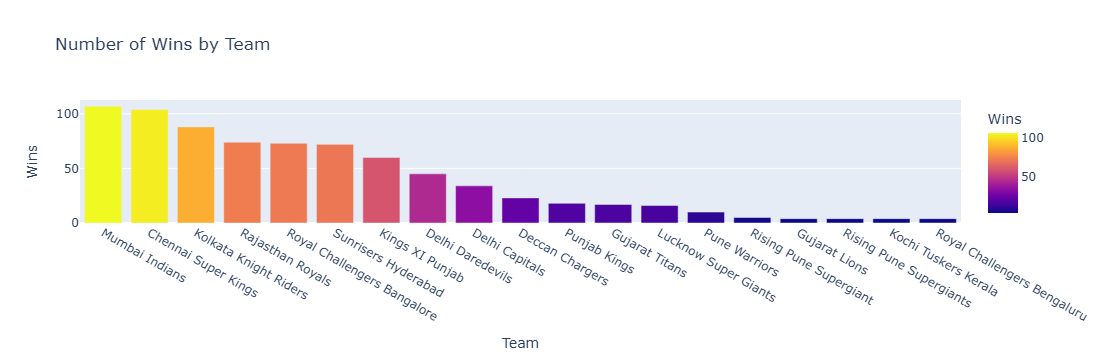

In [215]:
win_count = matches_df['winner'].value_counts().reset_index()
win_count.columns = ['Team', 'Wins']
fig = px.bar(win_count, 
             x = 'Team', 
             y = 'Wins', 
             title = 'Number of Wins by Team', 
             color = 'Wins')
fig.show()


In [216]:
fig = px.pie(win_count, 
             names = 'Team', 
             values = 'Wins', 
             title = 'Win Distribution by Teams')
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'Team=%{label}<br>Wins=%{value}<extra></extra>',
              'labels': array(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
                               'Rajasthan Royals', 'Royal Challengers Bangalore',
                               'Sunrisers Hyderabad', 'Kings XI Punjab', 'Delhi Daredevils',
                               'Delhi Capitals', 'Deccan Chargers', 'Punjab Kings', 'Gujarat Titans',
                               'Lucknow Super Giants', 'Pune Warriors', 'Rising Pune Supergiant',
                               'Gujarat Lions', 'Rising Pune Supergiants', 'Kochi Tuskers Kerala',
                               'Royal Challengers Bengaluru'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([107, 104,  88,  

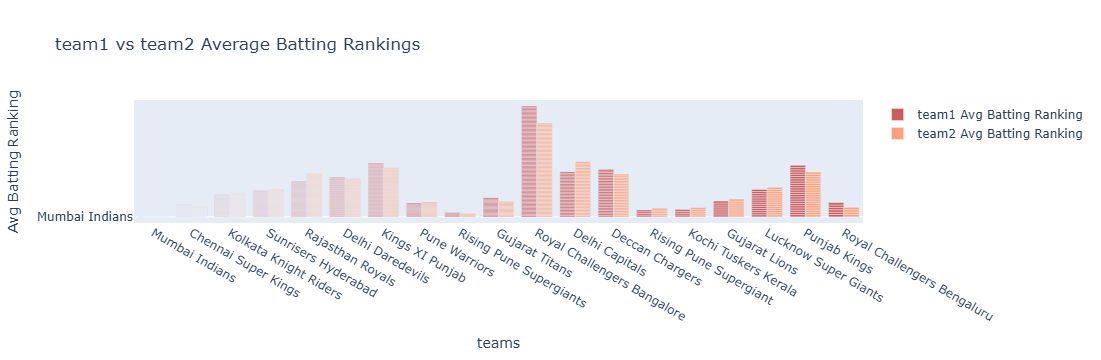

In [217]:
fig = go.Figure()
fig.add_trace(go.Bar(x = matches_df['team1'], 
                     y = matches_df['team1'], 
                     name = 'team1 Avg Batting Ranking', 
                     marker_color = 'indianred'))
fig.add_trace(go.Bar(x = matches_df['team2'], 
                     y = matches_df['team2'], 
                     name = 'team2 Avg Batting Ranking', 
                     marker_color = 'lightsalmon'))
fig.update_layout(
    title = 'team1 vs team2 Average Batting Rankings', 
    xaxis_title = 'teams', 
    yaxis_title = 'Avg Batting Ranking', 
    barmode = 'group')
fig.show()

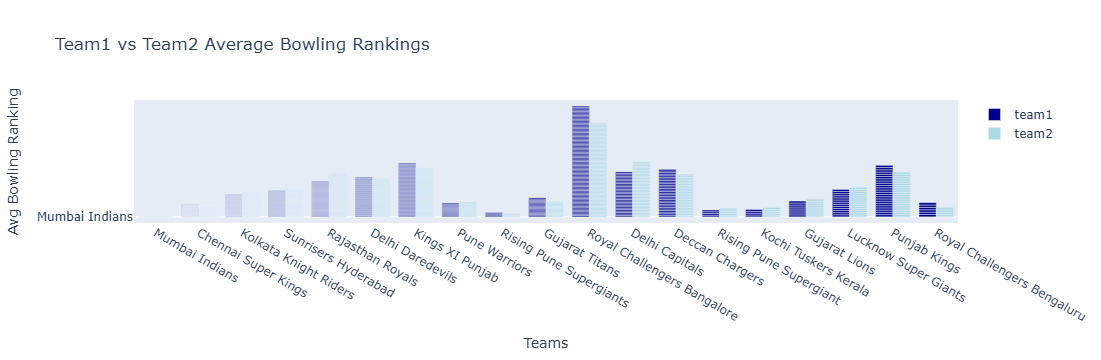

In [218]:
fig = go.Figure()
fig.add_trace(go.Bar(x = matches_df['team1'], 
                     y = matches_df['team1'], 
                     name = 'team1', 
                     marker_color = 'darkblue'))
fig.add_trace(go.Bar(x = matches_df['team2'], 
                     y = matches_df['team2'], 
                     name = 'team2', 
                     marker_color = 'lightblue'))

fig.update_layout(title = 'Team1 vs Team2 Average Bowling Rankings', 
                  xaxis_title = 'Teams', 
                  yaxis_title = 'Avg Bowling Ranking', 
                  barmode = 'group')
fig.show()

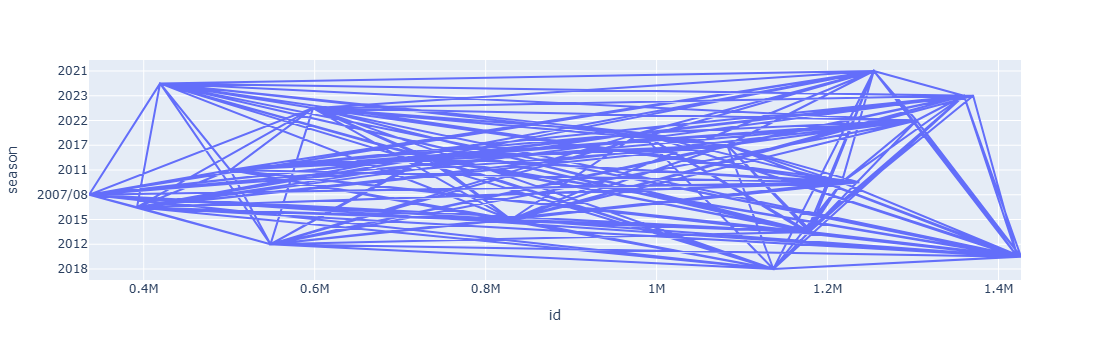

In [219]:
fig = px.line(matches_df, 
              x = 'id', 
              y = 'season', )
fig.show()

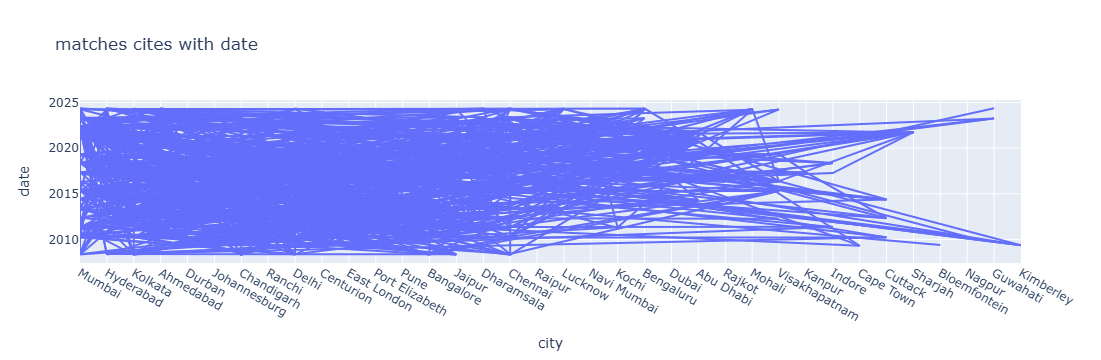

In [220]:
fig = px.line(matches_df, 
              x = 'city', 
              y = 'date', 
              title = 'matches cites with date')
fig.show()

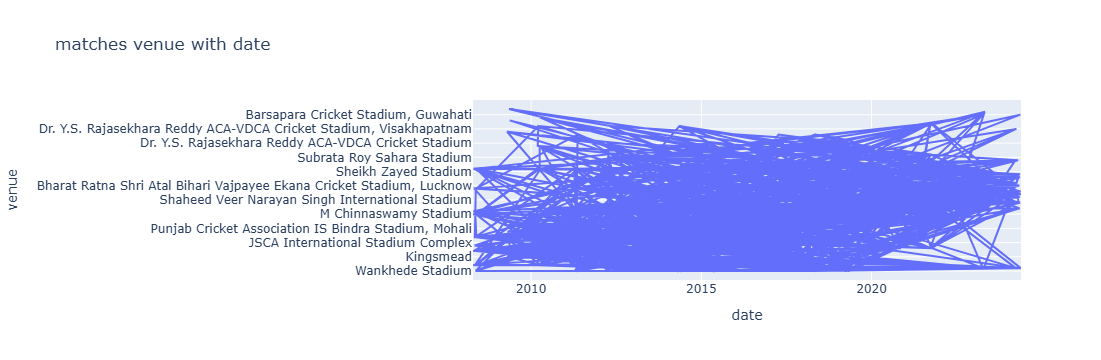

In [221]:
fig = px.line(matches_df, 
              x = 'date', 
              y = 'venue', 
              title = 'matches venue with date')
fig.show()

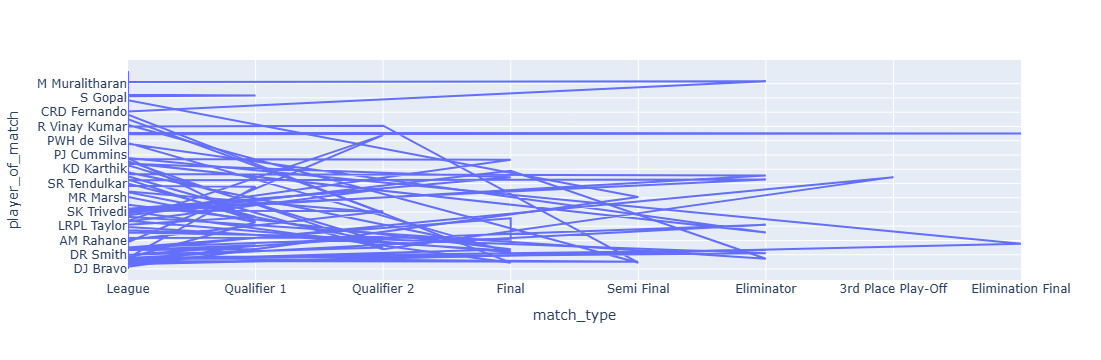

In [222]:
fig = px.line(matches_df, 
              x = 'match_type', 
              y = 'player_of_match', )
fig.show()

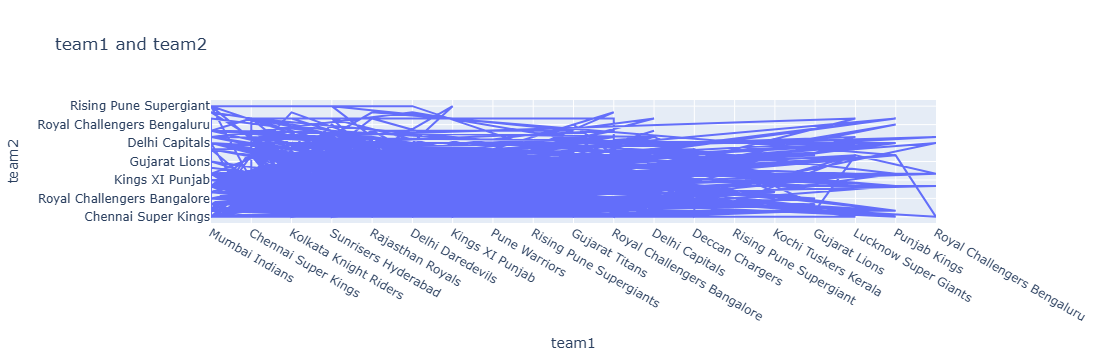

In [223]:
fig = px.line(matches_df, 
              x = 'team1', 
              y = 'team2', 
              title = 'team1 and team2')
fig.show()

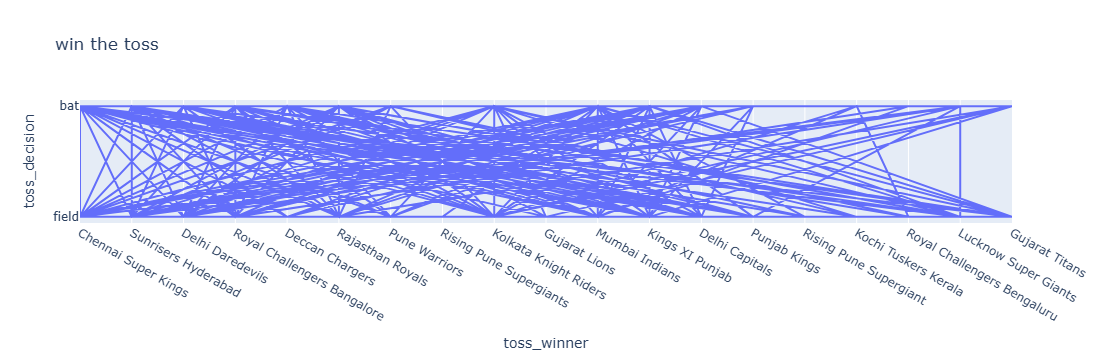

In [224]:
fig = px.line(matches_df, 
              x = 'toss_winner', 
              y = 'toss_decision', 
              title = 'win the toss')
fig.show()

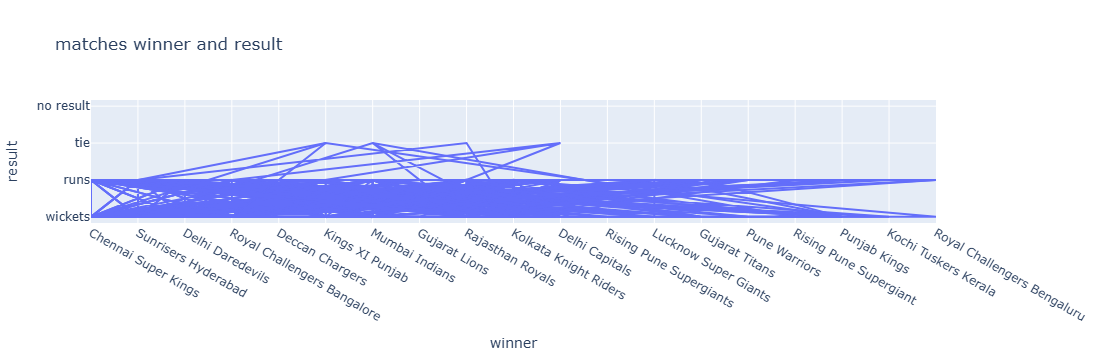

In [225]:
fig = px.line(matches_df, 
              x = 'winner' ,
              y = 'result', 
              title = 'matches winner and result')
fig.show()

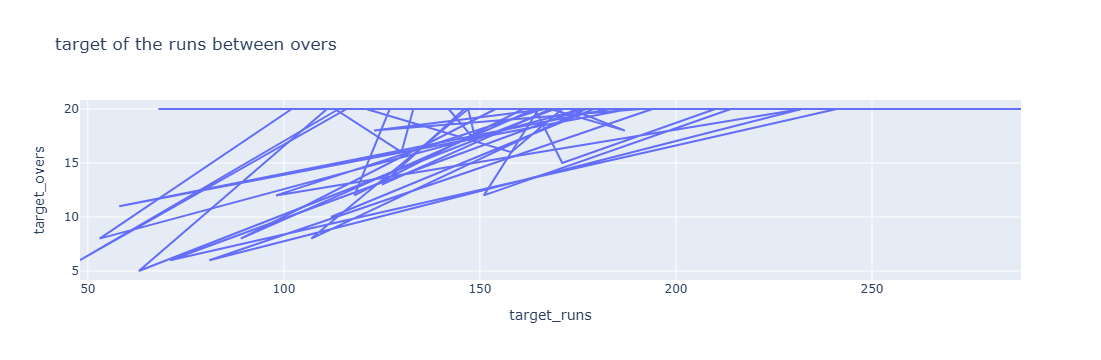

In [226]:
fig = px.line(matches_df, 
              x = 'target_runs', 
              y = 'target_overs', 
              title = 'target of the runs between overs')
fig.show()

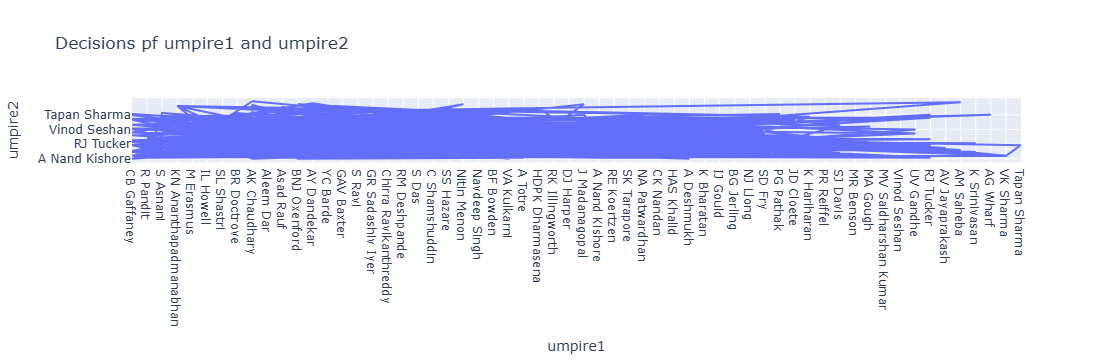

In [227]:
fig = px.line(matches_df, 
              x = 'umpire1', 
              y = 'umpire2', 
              title = 'Decisions pf umpire1 and umpire2')
fig.show()

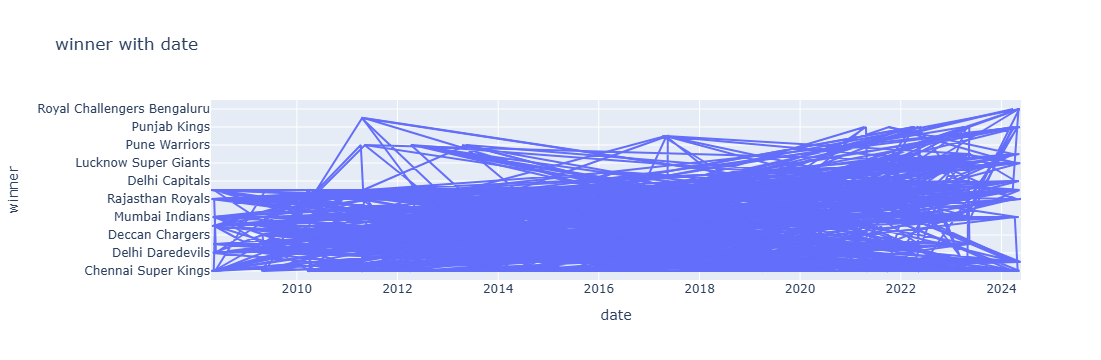

In [228]:
fig = px.line(matches_df, 
              x = 'date', 
              y = 'winner', 
              title = 'winner with date')
fig.show()


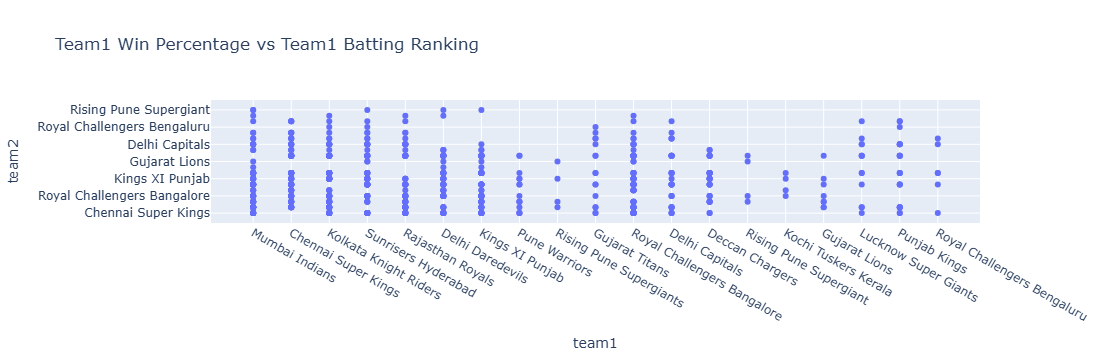

In [229]:
fig = px.scatter(matches_df, 
                 x = 'team1', 
                 y = 'team2', 
                 title = 'Team1 Win Percentage vs Team1 Batting Ranking')
fig.show()

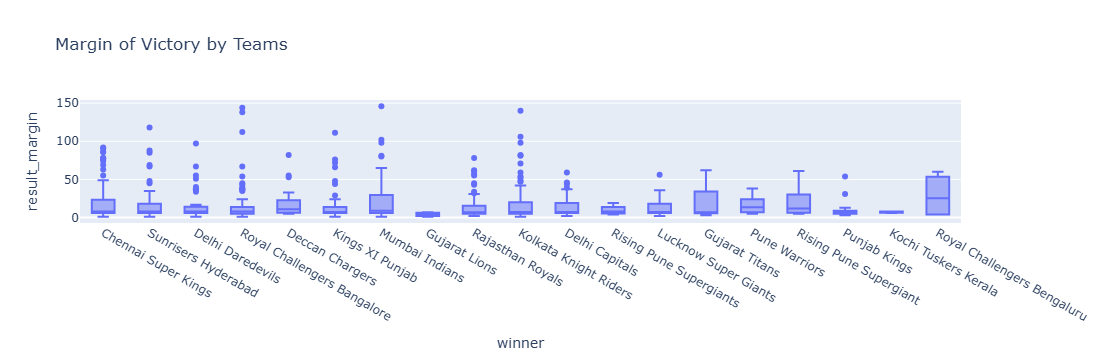

In [230]:
fig = px.box(matches_df, x = 'winner', 
             y = 'result_margin', 
             title = 'Margin of Victory by Teams')
fig.show()

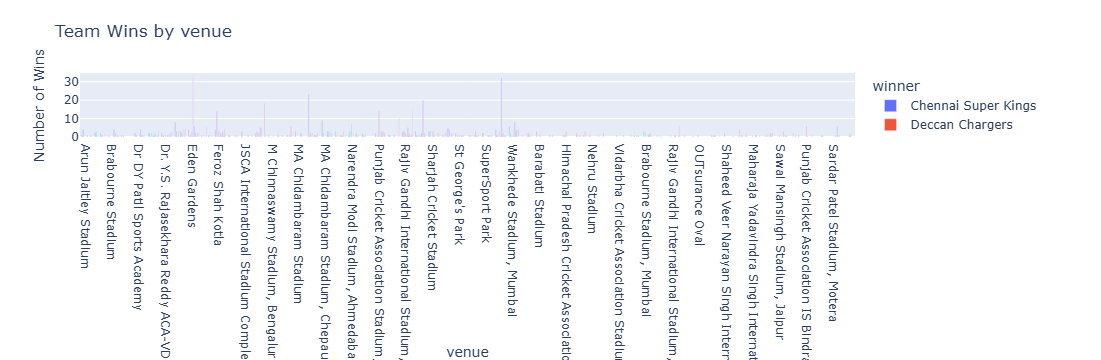

In [231]:
ground_performance = matches_df.groupby(['winner', 'venue']).size().reset_index(name='Wins')

fig = px.bar(ground_performance, 
             x = 'venue', 
             y = 'Wins', 
             color = 'winner', 
             title = 'Team Wins by venue',
             labels = {'venue': 'venue', 'Wins': 'Number of Wins', 'Winner': 'Teams'}, 
             barmode = 'group')
fig.show()

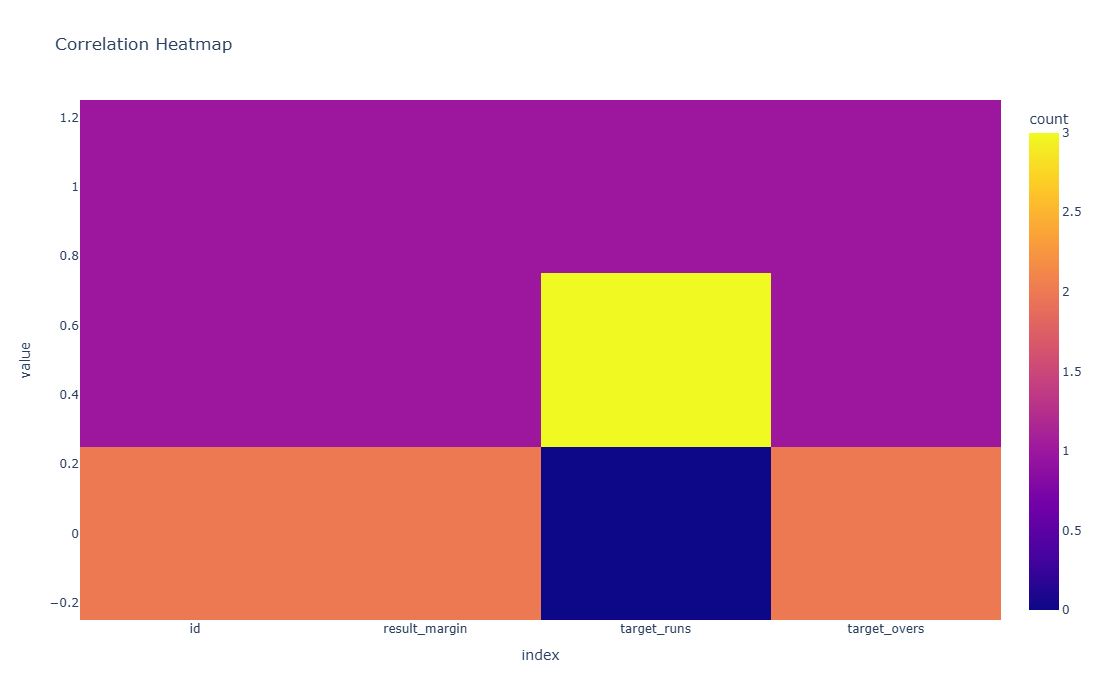

In [232]:
s = matches_df.select_dtypes(include = 'number').corr() 
fig = px.density_heatmap(s, title = 'Correlation Heatmap')
fig.update_layout(
height = 700,
width = 900
)
fig.show()